# HW1

GENERAL INSTRUCTIONS:

- For all ggplots, make sure you make changes so that the data viz is effective, clear, and does not contain distracting elements.
- CLEARLY mark where you are answering each question.
- Show all code necessary for the analysis, but remove superfluous code

---
## 1

Using the dataset linked [here](https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/reactionTime.csv), build a linear regression model to predict *reaction time* based on all the other variables. 

<ul>
    <li> a) use an 80/20 train test split for model validation and make sure you z score your continuous variables
    
<li> b) check the linearity assumption for your continuous variables using ggplot. Discuss in detail what you are checking for and what you see for this model.
<li> c) check heteroskedasticity by plotting predicted reaction times/residuals using ggplot. Discuss in detail what you are checking for and what you see for this model.
<li> d) discuss in detail which metrics you use to check your model performance and why, and whether you think your model did well.
</ul> 

Feel free to add cells to this notebook in order to execute the code, but for parts b,c, and d, make sure you put the discussion part in a *Markdown* cell, do not use code comments to answer. 

In [1]:
# import necessary packages
import warnings
warnings.filterwarnings('ignore')


import pandas as pd
import numpy as np
from plotnine import *

from sklearn.linear_model import LinearRegression # Linear Regression Model
from sklearn.preprocessing import StandardScaler #Z-score variables
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score #model evaluation


from sklearn.model_selection import train_test_split # simple TT split cv
from sklearn.model_selection import KFold # k-fold cv


%matplotlib inline

In [2]:
# data
reactionDF = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/reactionTime.csv")
reactionDF.head()

,age,boredom_rating,risk_propensity,height,left_handed,reaction_time
0,32,15.75,14,151.99,0,1435.700562
1,48,97.28,4,162.39,0,436.858176
2,35,65.73,18,148.42,1,878.039528
3,33,40.30,13,121.12,0,1056.733539
4,37,82.32,15,139.74,0,633.438797


**1a) use an 80/20 train test split for model validation and make sure you z score your continuous variables**

In [3]:
# Split Data
RTpredictors = ["age","boredom_rating","risk_propensity","height",
                "left_handed"]

X = reactionDF[RTpredictors]
y = reactionDF["reaction_time"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#standardize the predictor variables
zscore = StandardScaler()
zscore.fit(X_train)

Xz_train = zscore.transform(X_train)
Xz_test = zscore.transform(X_test)

lr = LinearRegression()
lr.fit(Xz_train, y_train)

LinearRegression()

In [4]:
# predictions using training set
reaction_pred = lr.predict(Xz_train) 
reaction_pred[1:10]

array([928.93856657, 876.24703461, 814.2324007 , 785.54239994,
       864.67179411, 943.10948616, 893.07417443, 841.4829    ,
       873.4393872 ])

In [5]:
# predictions using testing set
reactionTest_pred = lr.predict(Xz_test) 
reactionTest_pred[1:10]

array([881.98052258, 898.02053186, 886.1075575 , 812.98978333,
       952.69698914, 909.36791207, 872.00074478, 788.62077761,
       842.17515336])

In [6]:
mean_squared_error(y_train, reaction_pred)

221902.99715710268

In [7]:
r2_score(y_train, reaction_pred)

0.007061564258285302

**1b) check the linearity assumption for your continuous variables using ggplot.**

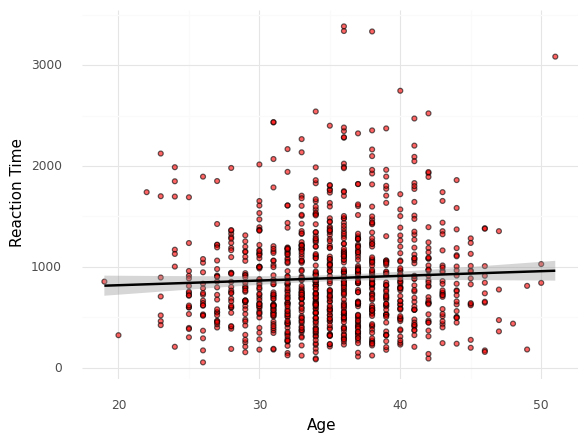

<ggplot: (8770423981794)>

In [8]:
(ggplot(reactionDF, aes (x = "age", y = "reaction_time")) 
+ geom_point(alpha = .6, fill = "red")) + theme_minimal() + geom_smooth(method = "lm") + xlab("Age") + ylab("Reaction Time")

**1b)**

The graph between age and reaction time is not linear, as all the points are pretty evenly distributed, with more in the middle-age range, and there is no distinct direction that the points are lined up in. When looking for a linear model, I'm looking for the data points in the graph to be clustered in a line formation with either or a positive or negative slope so that lower or higher x values generally have higher or lower corresponding y values. Since this graph does not show that, it violates the linearity assumption.

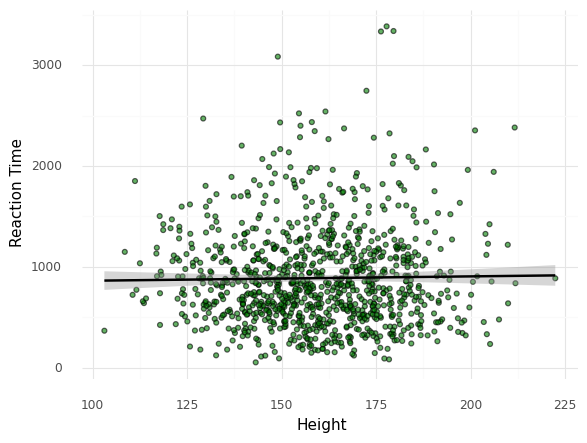

<ggplot: (8770424235439)>

In [9]:
(ggplot(reactionDF, aes (x = "height", y = "reaction_time")) 
+ geom_point(fill = "green",alpha = 0.6)) + theme_minimal() + geom_smooth(method = "lm") + xlab("Height") + ylab("Reaction Time")

**1b)**

The graph between height and reaction time is not linear, as there is no distinct direction the points are lined up in. The data is mostly clustered around the lower middle of the graph. When looking for a linear model, I'm looking for the data points in the graph to be distributed in a line formation with either or a positive or negative slope so that lower or higher x values generally have higher or lower corresponding y values. Since this graph does not show that, it violates the linearity assumption.

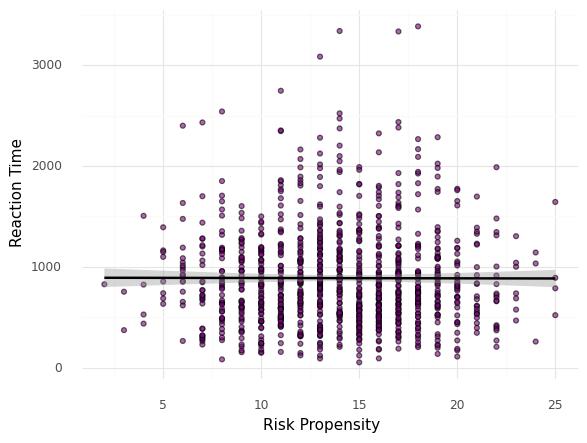

<ggplot: (8770424301900)>

In [10]:
(ggplot(reactionDF, aes (x = "risk_propensity", y = "reaction_time")) 
+ geom_point(alpha = .6, fill = "purple")) + theme_minimal() + geom_smooth(method = "lm") + xlab("Risk Propensity") + ylab("Reaction Time")

**1b)**

The graph between risk propensity and reaction time is not linear, as there is no distinct direction the points are lined up in. The data is spread out throughout the graph in no particular formation. When looking for a linear model, I'm looking for the data points in the graph to be distributed in a line formation with either or a positive or negative slope so that lower or higher x values generally have higher or lower corresponding y values. Since this graph does not show that, it violates the linearity assumption.

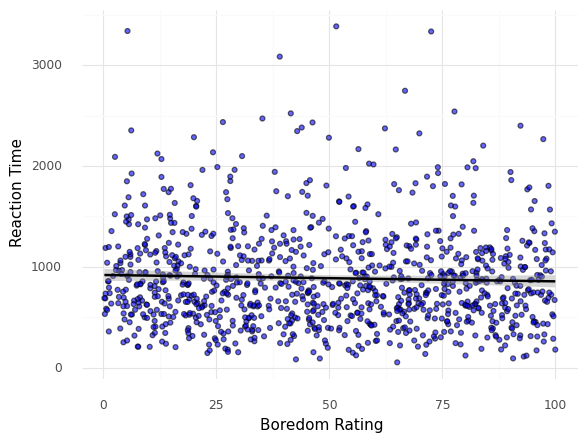

<ggplot: (8770424413377)>

In [11]:
(ggplot(reactionDF, aes (x = "boredom_rating", y = "reaction_time")) 
+ geom_point(alpha = .6, fill = "blue")) + theme_minimal() + geom_smooth(method = "lm") + xlab("Boredom Rating") + ylab("Reaction Time")

**1b)**

The graph between boredom rating and reaction time is not linear, as all the points are pretty evenly distributed and there is no distinct direction that the points are lined up in. When looking for a linear model, I'm looking for the data points in the graph to be clustered in a line formation with either or a positive or negative slope so that lower or higher x values generally have higher or lower corresponding y values. Since this graph does not show that, it violates the linearity assumption.

**c) Check heteroskedasticity by plotting predicted reaction times/residuals using ggplot. 
Discuss in detail what you are checking for and what you see for this model.**


In [12]:
true_vs_pred = pd.DataFrame({"predict": reaction_pred,
                             "residuals": y_train - reaction_pred})
true_vs_pred.head()

,predict,residuals
952,861.719020,44.548830
159,928.938567,-87.917682
779,876.247035,466.568956
805,814.232401,-635.213215
722,785.542400,425.453239


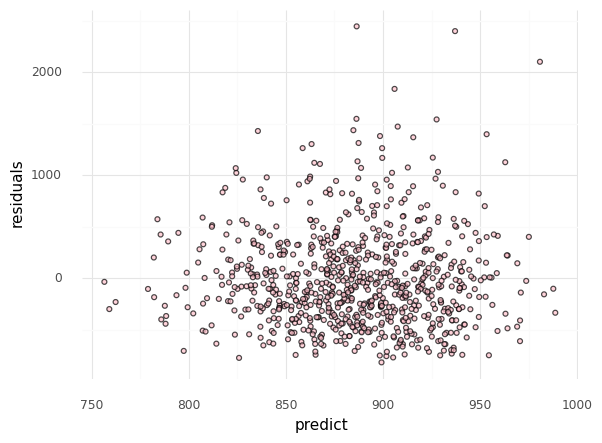

<ggplot: (8770424301424)>

In [13]:
(ggplot(true_vs_pred, aes(x = "predict", y = "residuals")) + geom_point(alpha = 0.7, fill = "pink")) + theme_minimal()

**c) Check heteroskedasticity by plotting predicted reaction times/residuals using ggplot. 
Discuss in detail what you are checking for and what you see for this model.**

Linear regression assumes that the error is around the same throughout the model. If the plot of residuals has a lot of the points clustered in a certain area, it means that the model is better at predicting in some parts of the model than in others, which is a bad sign that it's a good model. This residual plot is clustered around the bottom middle of the graph a little bit too much and the points are not evenly spread out throughout the graph, which means that it violates the homoscedacity assumption.



**d) discuss in detail which metrics you use to check your model performance and why, and whether you think your model did well.**

The three metrics I used to check my model were Mean Squared Error(MSE) and R-Squared (R2). The MSE shows the amount of error that the model has by comparing the predicted values to the actual values. The difference between the two is squared to make the sum the errors and then divide that by the number of data points to find the average, or mean, squared error. Since our MSE is really high (235560.69947001472), it is not promising because that means that the real values are far from the ones predicted by the model on average. The R-Squared represents how much the prediction improves in the regression model versus just the baseline mean model. The R-squared of 0.006424538239618194 is extremely low, which suggests that only around .64% of the variation in reaction time is explained by the model. Since the linearity and homoscedacity assumptions are violated, the MSE is very high, and the R-square is extremely low, I would say this is a very bad model and should not be used at all.

## 2
Using the data set linked [here](https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/fellAsleep.csv), build a logistic regression model that predicts whether or not someone fell asleep during the experiment based on all the other variables.
<ul>
<li> a) use k-fold cross validation and make sure to z score your continuous variables
<li> b) once you have used k-fold to validate your model's performance, fit another separate logistic regression with ALL the data. Grab the coefficients, put them in a data frame, add a column to the data frame with the names of the predictors, and make a bar chart (using ggplot) showing the magnitude of each coefficient. Your coef data frame should look like this:

| PredictorName | CoefficientValue |
|---------------|-------------------|
| Predictor_1   | xx.xx             |
| Predictor_2   | xx.xx             |
| ...           | ...               |
| Predictor_N   | xx.xx             |

Where `Predictor_1`, `Predictor_2`...`Predictor_N` are the names of your predictors and `xx.xx`s are your coefficient values.

<li> c) using this graph and the table of coefs generated above, interpret/discuss all your coefficients as if you were explaining the results to a non-data scientist. Include in your explanation, the reason for presenting the coefs in log odds, odds, or probability form.
<li> d) discuss in detail which metrics you use to check your model performance and why, and whether you think your model did well.
</ul>



Feel free to add cells to this notebook in order to execute the code, but for parts c and d, make sure you put the discussion part in a *Markdown* cell, do not use code comments to answer. CLEARLY mark where you are answering each question.

In [14]:
# import necessary packages
import warnings
warnings.filterwarnings('ignore')


import pandas as pd
import numpy as np
from plotnine import *

from sklearn.linear_model import LogisticRegression # Logistic Regression Model
from sklearn.preprocessing import StandardScaler #Z-score variables
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score

from sklearn.model_selection import train_test_split # simple TT split cv
from sklearn.model_selection import KFold # k-fold cv


%matplotlib inline

In [15]:
# code
sleepDF = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/fellAsleep.csv")
sleepDF.head()

,age,boredom_rating,risk_propensity,height,left_handed,fell_asleep
0,36,0.56,20,123.52,0,0
1,32,23.11,12,172.64,1,1
2,41,29.38,16,161.62,0,0
3,46,32.62,12,186.96,0,0
4,35,11.44,16,175.98,0,0


In [16]:
kf = KFold(n_splits = 10)

In [17]:
sleepPredictors = ["age","boredom_rating","risk_propensity","height","left_handed"]

X = sleepDF[sleepPredictors]
y = sleepDF[["fell_asleep"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#create logistic regression
myLogR = LogisticRegression() 

#create empty lists to store mse, R2, and accuracy for each fold
mse = []
R2 = []
acc = []

In [189]:
for train_indices, test_indices in kf.split(X):
    # Get your train/test for this fold
    X_train = X.iloc[train_indices]
    X_test  = X.iloc[test_indices]
    y_train = y.iloc[train_indices]
    y_test  = y.iloc[test_indices]
    
    zscore = StandardScaler()
    zscore.fit(X_train)
    
    Xz_train = zscore.transform(X_train)
    Xz_test = zscore.transform(X_test)
    
    # model
    model = myLogR.fit(Xz_train, y_train)
    
    #record MSEs
    mse.append(mean_squared_error(y_test, model.predict(Xz_test)))
    
    # record R2s
    R2.append(r2_score(y_test, model.predict(Xz_test)))
    
    # model accuracy
    acc.append(accuracy_score(y_test, model.predict(Xz_test)))

    

In [190]:
print(mse)
np.mean(mse)

[0.09, 0.1, 0.09, 0.1, 0.1, 0.07, 0.1, 0.13, 0.08, 0.09]


0.095

In [191]:
print(R2)
np.mean(R2)

[0.2941176470588235, 0.4666666666666667, 0.2941176470588235, 0.2912827781715097, 0.2912827781715096, 0.4186046511627908, 0.39722724532851117, -0.07973421926910307, 0.40476190476190477, 0.3303571428571428]


0.3108684241968579

In [192]:
print(acc)
np.mean(acc)

[0.91, 0.9, 0.91, 0.9, 0.9, 0.93, 0.9, 0.87, 0.92, 0.91]


0.905

In [193]:
#2b

X = sleepDF[sleepPredictors]
y = sleepDF[["fell_asleep"]] 

# create + fit logistic regression with all the data

zscore = StandardScaler()
X = zscore.fit_transform(X)

myLR = LogisticRegression() 
myLR.fit(X,y) 


LogisticRegression()

In [196]:
accuracy_score(y, model.predict(X))

0.909

In [197]:
coef = pd.DataFrame({"PredictorName": sleepPredictors, "CoefficientValue":myLR.coef_[0]})
coef = coef.append({"CoefficientValue": myLR.intercept_[0], 
               "PredictorName": "intercept"}, ignore_index = True)

In [198]:
coef

,PredictorName,CoefficientValue
0,age,0.982996
1,boredom_rating,0.362224
2,risk_propensity,-0.716346
3,height,-0.052922
4,left_handed,1.543997
5,intercept,-2.350145


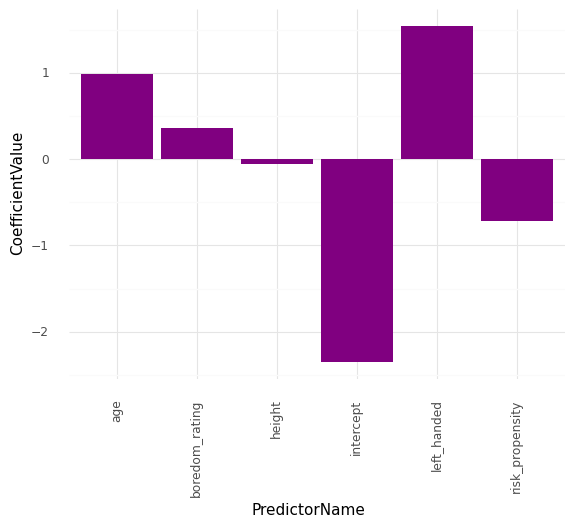

<ggplot: (8774246106465)>

In [199]:
ggplot(coef, aes (x = "PredictorName", y = "CoefficientValue")) + geom_bar(fill = "purple", stat = "identity") + theme_minimal() + theme(axis_text_x = element_text(angle = 90))

In [200]:
coef["Odds"] = np.exp(coef["CoefficientValue"])
coef

,PredictorName,CoefficientValue,Odds
0,age,0.982996,2.672452
1,boredom_rating,0.362224,1.436520
2,risk_propensity,-0.716346,0.488534
3,height,-0.052922,0.948454
4,left_handed,1.543997,4.683272
5,intercept,-2.350145,0.095355


**c) using this graph and the table of coefs generated above, interpret/discuss all your coefficients as if you were explaining the results to a non-data scientist. Include in your explanation, the reason for presenting the coefs in log odds, odds, or probability form.**

When trying to compare the effect of multiple different predictors on an outcome variable (in this case whether the individual fell asleep during the experiment or not), it is hard to do so without standardizing all of the results in some way. I used z-score to create standardized numbers for all of the variables, which uses a unit of 1 standard deviation. This way, when looking at the coefficients I can more accurately compare these variables on the same scale. I also converted these coefficients to odds, as they are easier to understand than log(odds), and are constant, unlike probability. Odds are how many times an event is more likely that the event will happen as it will not happen. With all this being said, here are the interpretations for each standardized variable in terms of odds:

Age: An increase in 1 standard deviation of age is associated with a 2.672452 times increase in the odds of falling asleep.

Boredom Rating: An increase in 1 standard deviation of boredom rating is associated with a 1.436520 times increase in the odds of falling asleep.

Risk Propensity: An increase in 1 standard deviation of risk propensity is associated with a 0.488534 times decrease in the odds of falling asleep.

Height: An increase in 1 standard deviation of age is associated with a 0.948454 times decrease in the odds of falling asleep.

Left Handed: Being left handed is associated with a 4.683272 times increase in the odds of falling asleep.


**d) discuss in detail which metrics you use to check your model performance and why, and whether you think your model did well.**

The main metric I used to check my model was the accuracy score. The Accuracy Score represents how accurate the model is at predicting the real data points. The accuracy of the training set model was 0.905 and the accuracy of the regression with all the data was 0.909, showing that this model was very accurate. Overall, I think the model performance did very well because of this high accuracy score.